## Problem Statement

Calculate the probability of a model ensemble that uses simple majority voting making an incorrect prediction in the following scenarios. (Hint: Understanding how to use the binomial distribution will be useful in answering this question.)

The ensemble contains 11 independent models, all of which have an error rate of 0.2.

The ensemble contains 11 independent models, all of which have an error rate of 0.49.

The ensemble contains 21 independent models, all of which have an error rate of 0.49.

In [6]:
from scipy.special import comb
import math

## Assumptions
    ### 1) all the different models (classifiers) have the equal error rate for each of three cases
    ### 2) the classifiers are independent and the error rates are not correlated.
### So under these assumptions we can simply express the error probability of an ensemble as a probability mass function of a binomial distribution

In [30]:
# Probability Mass Function of a binomial distribution
def ensemble_error(n_clf, err):
    k_init = int(math.ceil(n_clf / 2))
    probs = [comb(n_clf, k) # This is the binomial coeff "n choose k"
        * err**k
        * (1 - err)**(n_clf - k) 
        for k in range(k_init, n_clf + 1)]
    return sum(probs)

In [33]:
# Here we are looking at an example of 11 base classifiers (n_clf = 11)
# each classifier has an error rate of 0.2(err=0.2) 
print("11 models error rate=0.2  ", ensemble_error(11, 0.2))
# we can see that the error rate of the ensemble (0.011) is much lower than the error rate of each individual classifier(0.2) if all the above assumptions are met

11 models error rate=0.2   0.011654205440000008


In [35]:
# Similarly doing the ensemble for the remaining
# For both the below cases the ensemble error rate is less than the individual error rate of the classifiers
# example of 11 independent models all of which have an error rate of 0.49 
print("11 models error rate=0.49  ", ensemble_error(11, 0.49))
# example of 11 independent models all of which have an error rate of 0.49 
print("21 models error rate=0.49  ", ensemble_error(21, 0.49))

11 models error rate=0.49   0.47294772571497457
21 models error rate=0.49   0.46304790101273546


In [40]:
import numpy as np

error_range = [0.2,0.49,0.49]
clf_range = [11,11,21]
ens_errors = [ensemble_error(n_clf=clf, err=err) for err,clf in zip(error_range,clf_range)]
ens_errors

[0.011654205440000008, 0.47294772571497457, 0.46304790101273546]

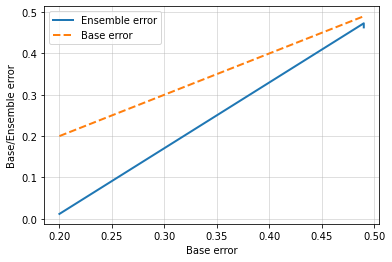

In [39]:
# In order to visualize the ensemble error rates for the different base errors we draw the below line graph
# As we see in the resulting plot the error probability of the ensemble is always better than the error of the individual base classifier.
# This also shows that the this is true as long as the base classifier perform better than random guessing (err < 0.5)
import matplotlib.pyplot as plt

plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
#plt.savefig('images/07_03.png', dpi=300)
plt.show()